Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [6]:
NAME = "Nahom Agize"
COLLABORATORS = ""

# CS110 Fall 2020 - Final Project
# Designing a plagiarism detector

**Fell free to add more cells to the ones always provided in each question to expand your answers, as needed. Make sure to refer to the [CS110 course guide](https://drive.google.com/file/d/1NUeMvAiGGMjif8IgLZjvwvwwzjBEx9Q0/view?pli=1) on the grading guidelines, namely how many HC identifications and applications you are expected to include in each assignment.**

Throughout the assignment, key **"checklist items"** you have to implement or answer are bolded, while *hints* and other interesting accompanying notes are written in italics to help you navigate the text.

If you have any questions, do not hesitate to reach out to the TAs in the Slack channel "#cs110-algo-f20", or come to one of your instructors' OHs.

### Submission Materials
Your assignment submission needs to include the following resources:
1. A PDF file must be the first resource and it will be created from the Jupyter notebook template provided in these instructions. Please make sure to use the same function names as the ones provided in the template. If your name is “Dumbledore”, your PDF should be named “Dumbledore.pdf”.
2. Your second resource must be a single Python/Jupyter Notebook named “Dumbledore.ipynb”. You can also submit a zip file that includes your Jupyter notebook, but please make sure to name it “Dumbledore.zip” (if your name is Dumbledore!).

## Question 0 [#responsibility]

Take a screenshot of your CS110 dashboard on Forum where the following is visible:
* your name.
* your absences for the course have been set to excused up to the end of week 9 (inclusively).

This will be evidence that you have submitted acceptable pre-class and make-up work
for a CS110 session you may have missed. Check the specific CS110 make-up and
pre-class policies in the syllabus of the course.

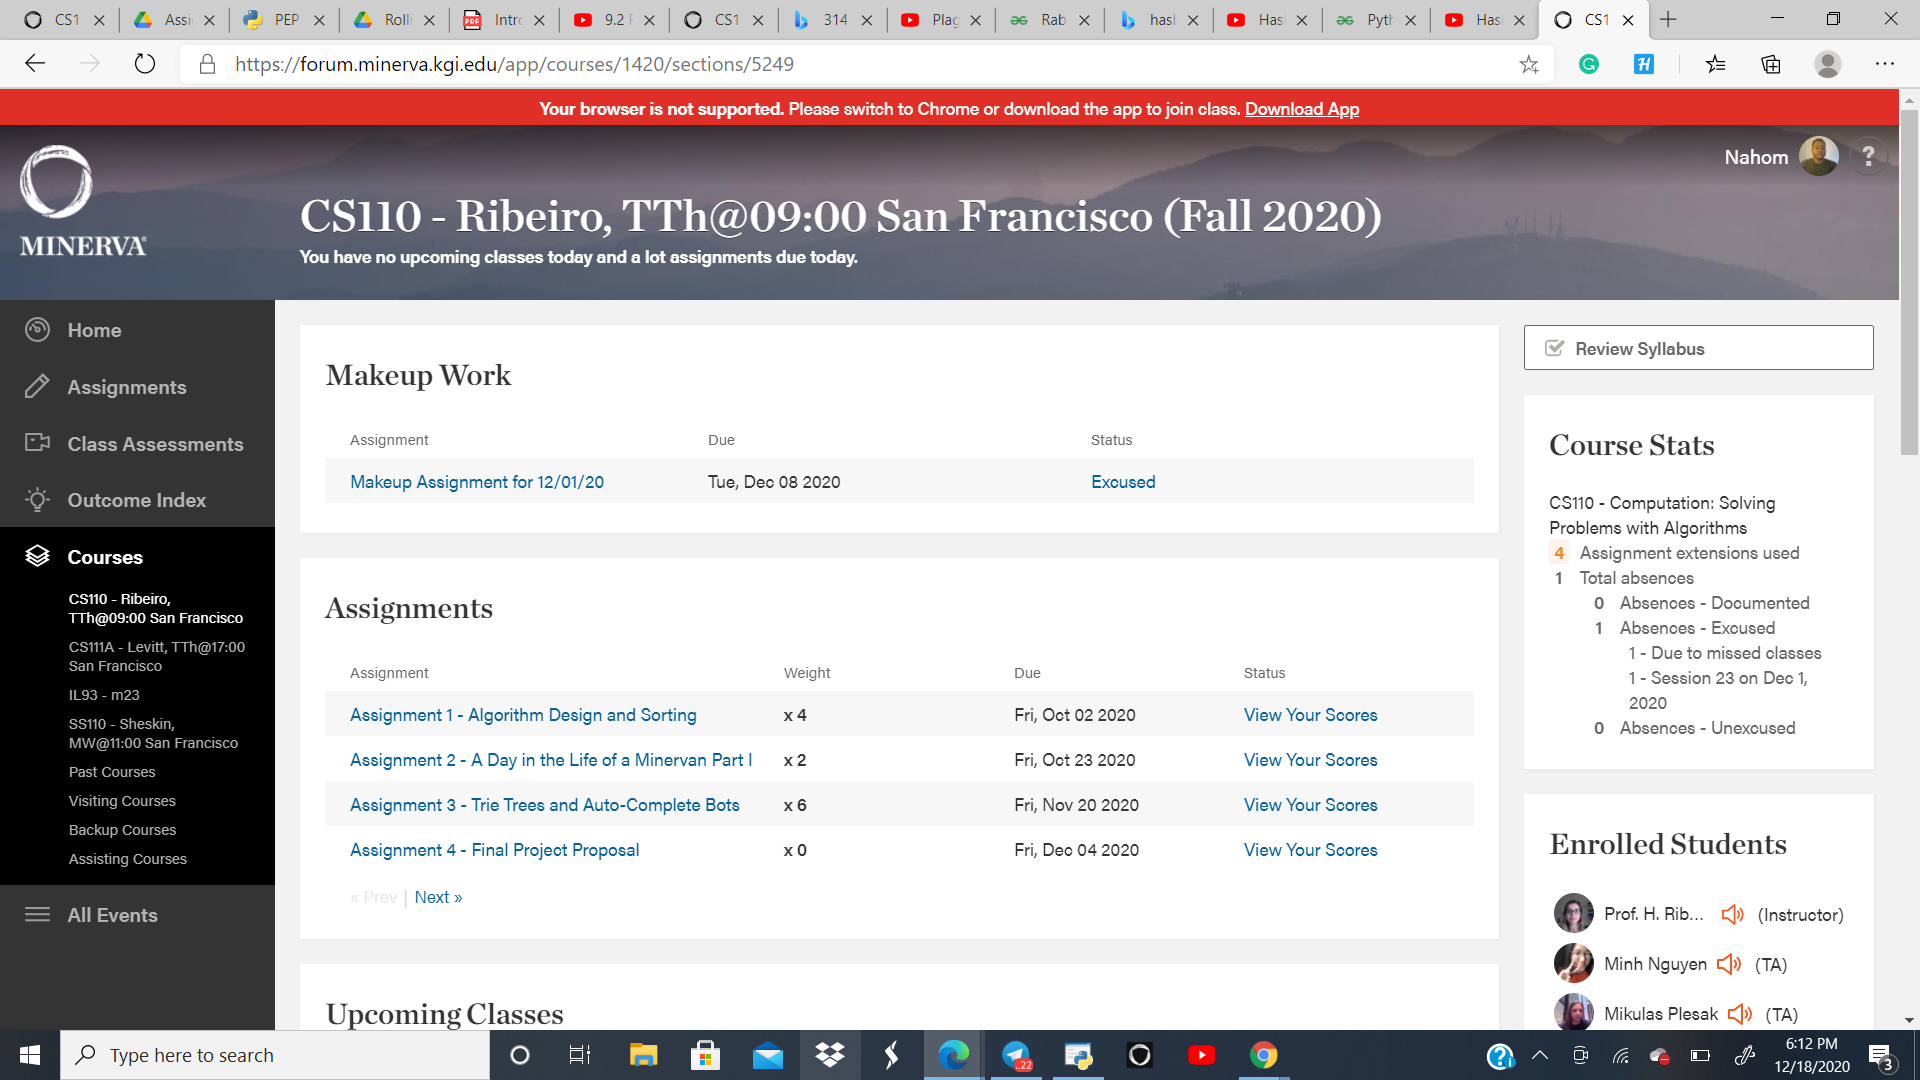

In [79]:
from IPython.display import Image
Image(filename="finals_forum.png")

## Overview

You will build, compare, and contrast different implementations of the same plagiarism detector. Along the way, you will study the rolling hashing technique.

#### Background Reading
Before working on the assignment, here are two resources you should read through:
- Cormen et al., ibid, Part VII, section 32.1 and 32.2.
- Rolling Hashing

#### Overall Problem Formulation
Suppose each student submission is a string that is a result of concatenating all the words there (i.e., white spaces are removed). Let X and Y be two student submission strings. Find all the common substrings of length k (known as
k-gram) of the two strings. In other words, determine all (i,j) where X[i:i+k]=Y[j:j+k].

For example, X="today is Monday", Y="day". All possible (i,j) from these two strings are (2,0) and (10,0) for k=3 (“day" appears twice in X, and we disregard the white spaces).


### Q1: Using Rolling Hashing

You will build the first implementation to solve the problem stated above. The algorithm is as follows:
- Store all length-k substrings of X into a hash table TX with the hash values computed by using rolling hashing.
- For each substring sy in Y, compute the hash value h(sy) using rolling hashing, and use this hash value to look up sy in table TX. If the lookup is successful, then we have a common substring.

Using this algorithm, complete the function below. There is a lot to fill in as you write the code:
- You will need to specify q for the hash function a mod q in rolling hashing. However, do not worry about fine-tuning q—so long as you choose a prime number and provide a justification for why your chosen value of q makes sense with regards to the table size.
- Other design choices should be thoroughly justified, including but not limited to: the hash table’s size,
data structures used, and any additional Python functions.
- No external libraries should be used, except for math, random, and numpy.

#### Q1a: Rolling-Hashing Implementation

Here is a function setup to get you started:

In [169]:
def rh_get_match(x, y, k):
    """
    Finds all common length-k substrings of x and y
    using rolling hashing on both strings.
    Input:
    - x, y: strings
    - k: int, length of substring
    Output:
    - A list of tuples (i, j) where x[i:i+k] = y[j:j+k]
    """
    ## your code here

In [170]:
def rh_get_match(x, y, k):
    
    
    x = x.lower().replace(' ','')       #removes Lowercase + spaces
    y = y.lower().replace(' ','')
    
    n = len(x)
    m = len(y)                      
    d = 128             #d is the radix base
    q = (n-k+1)*5       #q is the hash_table size
    h = 1               #initialize h for later use
    
    
    h_value_x = 0   #initialize hashvalue for substrings of x                
    h_value_y = 0   #initialize hashvalue for substrings of y
    Tx = []         #Hashtable for x

    
    
    for i in range(k-1):
        h = (h*d)%q
    
    #loop of k-length and assign hash-value
    for i in range(k):
        #defines the hashvalue for the first substring from x
        h_value_x = (d*h_value_x + ord(x[i]))%q  
        #defines the hashvalue for the first substring from y
        h_value_y = (d*h_value_y + ord(y[i]))%q          
    
    #append the first tuple of (hash-value, substring) into hashtable Tx
    Tx.append((h_value_x,  x[:k]))
    
    
    
    #loop through x
    for s in range(1, n-k+1):
        
        if s < n-k+1:

            #Perform rolling hashing i.e. remove prior character & add new character
            h_value_x = (d*(h_value_x - ord(x[s-1])*h) + ord(x[s+k-1])) %q   
            #append tuple of (hash-value, substring) into hashtable Tx
            Tx.append((h_value_x,  x[s:s+k]))

    #Empty list to store matches
    matches = []
    count = 0
    #loop through y
    for s in range(1, m-k+1):
          
        if s < m-k+1:
            #Perform rolling hashing upto last substring of y
            h_value_y = (d*(h_value_y - ord(y[s-1])*h) + ord(y[s+k-1])) %q 
            
            #loop through hashtable for comparison 
            for tuples in Tx:
                a,b = tuples
                
                #checks if current hashvalue, substring of y 
                #equals any hashvalue, substring of x
                if h_value_y == a and y[s:s+k] == b:
                    #append the index of the match to matches
                    
                    matches.append((Tx.index(tuples)+count,s))
                    Tx.remove(tuples)
                    count += 1
    
    return(matches)

Demonstrate that your code works as expected by testing it with at least three, non-trivial test cases.

In [171]:
x1 = "squarerootoffortynineisseven"
y1 = "youmightsayiamwrongbutsquarerootoffortynineisseven"

x2 = "today is Monday"
y2 = "day"

x3 = "Grammarly premium has an online plagiarism checker"
y3 = "Minerva provides premium access to grammarly"

x4 = "racecar"
y4 = "carrace"

testcase_1 = rh_get_match(x1,y1,15)
testcase_2 = rh_get_match(x2,y2,3)
testcase_3 = rh_get_match(x3,y3,3)
testcase_4 = rh_get_match(x4,y4,3)


print("First testcase has (i,j) values:", testcase_1) 
print("Second testcase has (i,j) values:", testcase_2)   #fails to consider 0_index :(
print("Third testcase has (i,j) values:", testcase_3)
print("Fourth testcase has (i,j) values:", testcase_4)


First testcase has (i,j) values: [(0, 22), (1, 23), (2, 24), (3, 25), (4, 26), (5, 27), (6, 28), (7, 29), (8, 30), (9, 31), (10, 32), (11, 33), (12, 34), (13, 35)]
Second testcase has (i,j) values: []
Third testcase has (i,j) values: [(24, 1), (10, 15), (11, 16), (12, 17), (13, 18), (14, 19), (6, 30), (7, 31), (8, 32), (9, 33), (10, 34), (11, 35), (12, 36)]
Fourth testcase has (i,j) values: [(0, 3), (1, 4)]


### Q2: Using Regular Hashing - Randomized

- Store all length-k substrings of X into a hash table TX, using a hash function that does not entail the division method.
- For each substring sy in Y, compute the hash value h(sy) and use this hash value to look up sy in table TX. If the lookup is successful, then we have a common substring.

Note that using a hash function that does not entail the division method prohibits the use of rolling hashing.
Asymptotically speaking, we are essentially taking more time for computing hash values in this version.
However, we are now free to choose a more fancy function, so there is a tradeoff here.

- Reflect on what makes a good hash function. Run an experiment to give empirical evidence to support your choice for the hash function.
- Implement the second version using the template below. Make sure to:
1. Justify any design choices (the hash function, the hash table’s size, the data structures used,
and any additionally built Python function).
2. Write clean and well-structured code, making use of PEP 8 coding conventions. Because this version only differs from the one in task 1 in how the hash values are computed, try to organize your code in a clear way that reutilizes as much functionality as the one you have already provided code for (for example, consider adding the hashing method either as a positional argument or as a method of choice if you wrap your code in a Python class).
3. No external libraries should be used, except for the math, random, and numpy modules.

#### Q2a: Regular Implementation - Randomized

Here is a function setup to get you started:

In [172]:
import random
def regular_get_match(x, y, k):
    """
    Finds all common length-k substrings of x and y
    NOT using rolling hashing on both strings.
    
    Input:
        - x, y: strings
        - k: int, length of substring
    Output:
        - A list of tuples (i, j)
    where x[i:i+k] = y[j:j+k]
    """
    x = x.lower().replace(' ','')       #removes Lowercase + spaces
    y = y.lower().replace(' ','')
    
    n = len(x)    #length of x
    m = len(y)    #length of y
    
    #an array to store final list of tuples
    result = []
    
    #initiating hashtable for x
    Tx = [[] for _ in range(m * k)]
    #hash_size is length of hash_table
    hash_size = len(Tx) 
    
    #loop through x
    for i in range(n-k+1):
        
        #determining the index (hashvalue) for current substring of x
        x_index = random_hash(x[i:i+k]) % hash_size
        #appeneding the substring hashtable in determined index
        Tx[x_index].append(x[i:i+k])
        
        #an array to store the matching y indexes 
        matches = []
        #loop through y
        for s in range(m-k+1):
            #determining the index (hashvalue) for current substring of y
            y_index = random_hash(y[s:s+k]) % hash_size
            #check sublist in Tx of the current index of y
            if Tx[y_index]:
                #for loop to check all substrings in the sublist
                for sub_x in Tx[y_index]:
                    # check if current substring of y in the sublist,
                    # and if it matches current substring of x
                    if sub_x == y[s: s+k] and x[i:i+k] == y[s: s+k]:
                        matches.append(s)
                        break               #avoid duplicates
        
        #appends the tuples of matched indexes to final result
        for match in matches:
            result.append((i, match))
    return result    
       
    
def random_hash(substring):             #defines the hash function
    random.seed(ord(substring[0]))      #for consistency
    return random.getrandbits(19)       #returns random number

Illustrate how your code works by giving an explicit example. Further, implement at least three test cases to make sure your code works as expected.

In [173]:
x1 = "squarerootoffortynineisseven"
y1 = "youmightsayiamwrongbutsquarerootoffortynineisseven"

x2 = "today is Monday"
y2 = "day"

x3 = "Grammarly premium has an online plagiarism checker"
y3 = "Minerva provides premium access to grammarly"

x4 = "racecar"
y4 = "carrace"

testcase_1 = regular_get_match(x1,y1,15)
testcase_2 = regular_get_match(x2,y2,3)
testcase_3 = regular_get_match(x3,y3,3)
testcase_4 = regular_get_match(x4,y4,3)


print("First testcase has (i,j) values:", testcase_1) 
print("Second testcase has (i,j) values:", testcase_2)
print("Third testcase has (i,j) values:", testcase_3)
print("Fourth testcase has (i,j) values:", testcase_4)


First testcase has (i,j) values: [(0, 22), (1, 23), (2, 24), (3, 25), (4, 26), (5, 27), (6, 28), (7, 29), (8, 30), (9, 31), (10, 32), (11, 33), (12, 34), (13, 35)]
Second testcase has (i,j) values: [(2, 0), (10, 0)]
Third testcase has (i,j) values: [(0, 30), (1, 31), (2, 32), (3, 33), (4, 34), (5, 35), (6, 36), (9, 15), (10, 16), (11, 17), (12, 18), (13, 19), (24, 1)]
Fourth testcase has (i,j) values: [(0, 3), (1, 4), (4, 0)]


### Question 3

Carefully describe how you would use the code above to investigate the extent of plagiarism. Enumerate potential pitfalls and challenges of applying this algorithm for real-life use. Make sure you justify all the assumptions you make.

Inorder to measure the extent of plagiarism, I believe calculating the percentage of copied substrings should proivde sufficient information to base the argument that plagiarism is detected or not. For calculating the percentage, we can divide the results from the matching functions above by the total number of comparisons made between two given strings, then multiplying by 100. The total number of comparisons can be found by calculating (n-k+1) * (m-k+1), in the above codes. This is because (n-k+1) and (m-k+1) are the number of times the strings are being iterated through, and multiplying them would give us the possible combinations of comparisons made between each substring.Therefore, 
##### *percentage of plagiarism = (result / (n-k+1)*(m-k+1))*100

In real life, it is common for similar words to be used in multiple fields. The plagiarism detector identifies commonalities regardless of the fact that they are commonly used or not. This might cause a lot of unnecessary matches, especially for much smaller values of k. I assume it can might be mitigated by having a dictionary for these common words and disregarding those substrings from becoming a factor in the plagiarism detection algorithm. Another scenario might be cases where both submissions include somewhat similar content due to common knowledge in similar topics, and not necassarily because one plagiarized from the other. For this case, I assume there should be common terminologies that do not come into factor in a specific subject matter. One other potential challenge might also be determing k-value at every point, and deciding which would provide an optimal level of accuracy.

### Question 4 (#ComputationalCritique)

Discuss the time complexity of each algorithmic version. Compare and contrast the two versions by experimenting on self-generated inputs. You are encouraged to generate inputs of various natures as that would be more likely to tease out the strengths and/or weaknesses of the versions.

The first implementation seemed to have a better time complexity, simply due to the fact that rolling hashing allows us to roll through the given strings rather that utilizing an additional for-loop. i.e. We notice that there are a maximum of 2 nested for-loops in the first implementation, while the second implementation contains 3 nested for-loops. In the rolling hashing function, we will have time complexity of O(N*M) because the upper bound is bound be the length of the two strings and we look at the double for-loop to determine the bounds. In the second implementaiton, the time complexity will be O((N * M)^2). This is because there is an additional for loop, where the comparison between the substrings occur, having an impact on the overall time complexity of the algorithm.To be precise first for loops is O(M*N), second for-loop is O(N) and third for-loop is O(M). In both the cases mentioned here N is the length of the first submission i.e. x , and M is the lenght of the second submission i.e. y. 

In [174]:
import time
def time_complexity(file1, file2):     
    try:
        f1 = open(file1)
        f2 = open(file2)
    except IOError as error:
        return error
    else:
        f1_contents = f1.readline(20).replace(",", "").replace(".", "").replace("''", "").split()
        f2_contents = f2.readline(20).replace(",", "").replace(".", "").replace("''", "").split()
    first = ''.join(f1_contents)
    second =''.join(f2_contents)
    
    regular_match1 = []
    regular_match2 = []

    rh_match1 = []
    rh_match2 = []

    count = []
    word1 = first
    word2 = second
    word3 =''
    word4 = ''
    
    m = len(word1)
    n = len(word2)
    
    for i in range(1,10):
        time1 = 0
        time2 = 0
      
        for m in range(50):
            initial_time1 = time.time()
            a = rh_get_match(word1,word2,i)
            time1 += time.time() - initial_time1

            initial_time2 = time.time()
            b = regular_get_match(word1,word2,i)
            time2 += time.time() - initial_time2

          
        rh_match1.append(time1/50)        
        regular_match1.append(time2/50)  
        
    return rh_match1,regular_match1
    
file1 = 'Prestige1.txt'
file2 = 'Prestige2.txt'

time_complexity(file1,file2)

([0.00010106563568115234,
  0.00012534618377685547,
  0.00012056350708007813,
  0.00012125968933105469,
  0.00016671180725097656,
  0.00017146110534667968,
  0.00016702175140380859,
  0.00024012565612792968,
  0.00016839504241943358],
 [0.006974081993103027,
  0.005891880989074707,
  0.005364437103271485,
  0.004665889739990234,
  0.00457277774810791,
  0.004071707725524902,
  0.004101686477661133,
  0.003609490394592285,
  0.0030243682861328127])

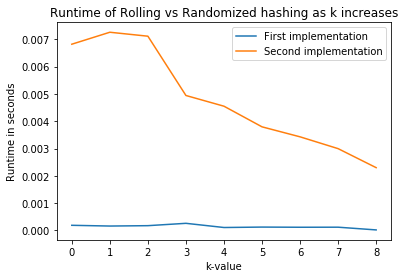

In [175]:
import matplotlib 
import matplotlib.pyplot as plt 

k = [i for i in range(9)]

plt.title("Runtime of Rolling vs Randomized hashing as k increases")
plt.plot(k, time_complexity(file1,file2)[0], label="First implementation",)
plt.plot(k, time_complexity(file1,file2)[1], label="Second implementation",)

plt.xlabel("k-value")

plt.ylabel("Runtime in seconds")

plt.legend()

# display plot
plt.show()

### Question 5

List all the LOs and HCs you have exercised while working on this final assignment as well as a thorough justification of their application. Review your previous assignments and in-class grades, and reflect on your application of these LOS has evolved over time

*** HCS***

##### #dataviz - While critiquing the compuation for both implementation using generated visualization from imported submissions. #dataviz was important because is showed the comparison in an easy manner.

##### #optimization - In both implementations, the objective function that I was optimizing for is the running time which is desired if it is minimized. Thus, the time complexity is the objective function, with decision variables such as hash funciton used, hashtable size. Depending on the perspective, the constraints could be syntax, length of k, the inputs x and y (including their lengthes).

##### #plausibility - While identifying potential pitfalls or challenges that either one of the implementations could face in real world scenario, I had to make sure that my assumptions were plausible. The hypothesis that common terminologies exist within a given field and commmon words exist across fields appeared to be a plausible potential pitfall.


*** LOs***
##### #ComputationalCritique - Question 4 shows the computational power of both implementations as k value gets bigger, with running time as y-axis.

##### #ComplexityAnalysis - Appropriately identified the bounds for both implementations. That is, the time complexity for the first and second implementation as described in the fourth question while correctly describing the values held by N and M. 

##### #CodeReadability - Based on the comment that I had recieved from my last assignment on auto-completion, I have started to include my comments one line higher than the actual code, which helps align the code in a more organized manner and making it easy to navigate through.
